# Stress Detection using ML

> Stress is a common experience that can have a negative impact on our mental and physical health. It is important to be able to identify stress and take steps to manage it. However, it can be difficult to identify stress, especially if it is chronic or low-level.

*  Social media platforms provide a unique opportunity to detect stress. People often share their feelings and experiences on social media, including their feelings of stress. By analyzing social media posts, it is possible to identify patterns that indicate stress.
*    In this project, we will develop a machine learning model to detect stress from social media posts. We will use a dataset of Reddit posts that are labeled as either "stressed" or "not stressed". We will train a model to identify the features of social media posts that are associated with stress.
*  Once the model is trained, we can use it to identify social media users who may be stressed. This information can be used to provide support to these users or to develop interventions to reduce stress.




## Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

## Load the dataset:

In [2]:
data = pd.read_csv("/content/drive/MyDrive/DataSets/Stress.csv")

## Data Preprocessing

In [3]:
nltk.download('stopwords')
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["text"] = data["text"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Create features and labels

In [4]:
x = np.array(data["text"])
y = np.array(data["label"])

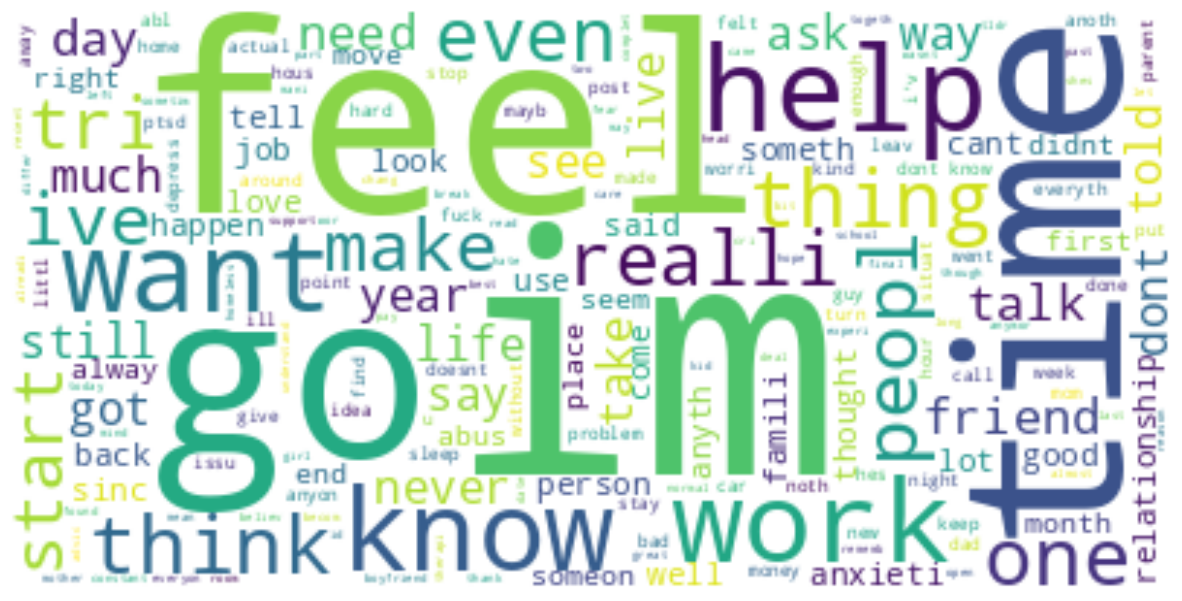

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Vectorize text data

In [5]:
cv = CountVectorizer()
X = cv.fit_transform(x)

## Split data into training and testing sets

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train the Bernoulli Naive Bayes model

In [7]:
model = BernoulliNB()
model.fit(x_train, y_train)

BernoulliNB()

## Test the model with user input:

In [18]:
user_input = input("Enter a text: ")
user_data = cv.transform([user_input]).toarray()
prediction = model.predict(user_data)

Enter a text: Sometime I feel like I need some help


## Print the prediction:

In [19]:
def fun(prediction):
    if prediction == 1:
        return "Stress"
    else:
        return "No Stress"

print("Detected:", fun(prediction[0]))

Detected: Stress
